# session 6. LSTM 모델을 활용한 투자전략 💥

안녕하세요, 데이크루 3기 ‘투데이💰︎' 팀입니다!

팀 투데이는 “투자에 데이터를 이용하다"의 약자입니다. 금융 데이터 수집&가공&모델링을 학습하면서 Financial Domain Knowledge와 Data Analysis Technologies 향상을 목적으로 하고 있습니다.
저희는 금융데이터와 AI기술이 만나는 전반적인 과정을 학습하고, 학습한 내용을 바탕으로 데이콘 이용자분들을 위한 콘텐츠를 제작하고 있습니다.  
**‘투데이💰︎’**의 여섯번째 포스팅의 주제는 **‘LSTM 모델을 활용한 투자전략’**입니다.

아래 링크를 들어가시면 ‘투데이💰︎’의 전 커리큘럼을 보실 수 있습니다.

→ <a href="https://dacon.io/competitions/official/235946/codeshare/5502?utm_source=dacrew&utm_medium=441593&utm_campaign=dacrew_2">[투데이💰0편] 금융 데이터 분석에 앞서</a>  
→ <a href="https://dacon.io/competitions/official/235946/codeshare/5547?utm_source=dacrew&utm_medium=441593&utm_campaign=dacrew_2">[투데이💰1편] 금융 데이터 수집</a>  
→ <a href="https://dacon.io/competitions/official/235946/codeshare/5701?page=1&dtype=random">[투데이💰2편] 거시경제 분석</a>  
→ <a href="https://dacon.io/competitions/official/235946/codeshare/5805?page=1&dtype=random">[투데이💰3편] 기본적 분석</a>    
→ <a href="https://dacon.io/competitions/official/235946/codeshare/5896?page=1&dtype=random">[투데이💰4편] 기술적 분석</a>    
→ <a href="https://dacon.io/competitions/official/235946/codeshare/6001?page=1&dtype=random">[투데이💰5편] ML(K-NN, Clustering)을 활용한 투자 전략</a>    

본 포스팅은 데이콘 서포터즈 “데이크루" 3기 활동의 일환입니다.

## **목차**
#### 1. LSTM 신경망 이해
#### 2. LSTM 실습 (시계열 예측 모델)
#### 3. LSTM 모델링 (기술지표, 재무제표 지표 등 Feature 구성 후 학습)
#### 4. 백테스팅 및 성과평가

# **1. LSTM 신경망 이해**

## 시계열이란?
* 대부분 머신러닝(ML) 모델은 입력 피처로써 샘플 데이터를 사용하지만, 데이터에 시간 차원은 없습니다. <br>
* 시계열 예측 모델은 이전에 관측된 값을 기반으로 미래의 값을 예측하는 모델이며, 비정형 데이터에서 많이 사용됩니다. <br>
* 비정형 데이터란, 평균 및 표준편차와 같은 통계적 특성이 시간이 지나면서, 일정하지 않은 데이터를 말합니다. <br>
* 시간 경과에 따른 온도, 주가, 주택 가격 등이 있으며, 입력 시간에 따라 연속적으로 나타나는 데이터셋을 의미합니다. <br><br>

<center><img src="https://drive.google.com/uc?id=1MZsZ1HJAo-eIrZeHcMj8VoE0Y1IA0Jg3" height=300 width=550></center>

<br><br>



## LSTM이란?

* LSTM은 LongShort-Term Memory의 줄임말 이며, 딥러닝 분야에 사용되는 순환신경망(RNN)의 gradient 소실 문제를 해결하기 위해 등장한 신경망 모델인데요. 주로 시계열 데이터를 다루는데 유용하다고 알려져 있으며, 단일 데이터(이미지), 전체 데이터(음성, 비디오 등) 처리도 가능하다고 알려져 있습니다. <br>
* 기존 RNN과 달리 LSTM은 은닉층을 의미하는 메모리 셀이 기본 구성요소 역할을 하는데, 메모리 셀에서는 일정 가중치가 적용된 시그모이드 함수, 탄젠트 함수를 통과한 값에 원소별 곱셈과 덧셈이 적용되며 이전 단계에서의 값이 다음 단계로 전달됩니다. 현재 LSTM 셀은 삭제, 입력, 출력 게이트로 이루어져 있습니다. <br>
* 삭제 게이트에서는 메모리 셀이 무한대로 증가하지 않도록 셀 상태를 설정하는 역할을 하는데 삭제 게이트를 통과하는 시점에 다음 단계로의 정보 통과 유무를 결정합니다. 입력 게이트는 입력 노드와 함께 셀 상태를 업데이트하는 역할을 하며, 출력 게이트에서는 은닉 층의 출력값을 업데이트하는 역할을 합니다. <br>
* LSTM은 반복적인 구조를 갖고 있어 과거로 부터 이어지는 시계열 형태의 데이터를 처리하는데 적절한데요. 즉, 기억력을 가지고 있어, 장기 메모리 모델을 뜻합니다. <br><br>

<center><img src="https://drive.google.com/uc?id=1imaHF4lXsDOXIn5ADHVkBKrbpMynT_tL" height=300 width=550></center>
<br><br>


# **2. LSTM 실습 (시계열 예측 모델)**

## 2-1. 삼성 데이터 가져오기

In [ ]:
! pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 1.7 MB/s 
     |████████████████████████████████| 52 kB 568 kB/s 
     |████████████████████████████████| 251 kB 27.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from pykrx import stock
from pykrx import bond

In [ ]:
df_samsung = stock.get_market_ohlcv("20180101", "20220731", "005930")
df_samsung

,시가,고가,저가,종가,거래량
날짜,,,,,
2018-01-02,51380,51400,50780,51020,169485
2018-01-03,52540,52560,51420,51620,200270
2018-01-04,52120,52180,50640,51080,233909
2018-01-05,51300,52120,51200,52120,189623
2018-01-08,52400,52520,51500,52020,167673
...,...,...,...,...,...
2022-07-25,60900,61900,60800,61100,9193681
2022-07-26,60800,61900,60800,61700,6597211
2022-07-27,61300,61900,61200,61800,7320997


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


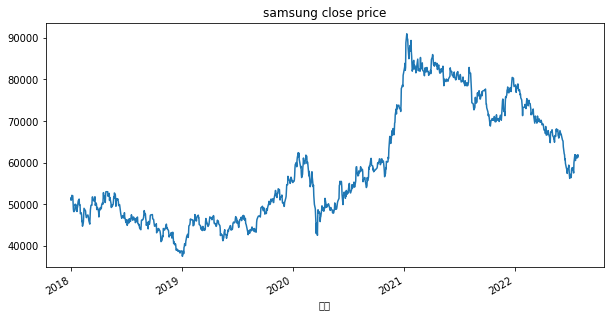

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('samsung close price')
df_samsung['종가'].plot()

## 2-2. 스케일링 진행

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_samsung.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['시가', '고가', '저가', '종가', '거래량']
df_samsung_scaled = scaler.fit_transform(df_samsung[scale_cols])
df_samsung_scaled = pd.DataFrame(df_samsung_scaled)
df_samsung_scaled.columns = scale_cols

df_samsung_scaled

,시가,고가,저가,종가,거래량
0,0.568992,0.530992,0.567374,0.253408,0.001877
1,0.581838,0.542975,0.574525,0.264613,0.002218
2,0.577187,0.539050,0.565810,0.254528,0.002590
3,0.568106,0.538430,0.572067,0.273950,0.002100
4,0.580288,0.542562,0.575419,0.272082,0.001857
...,...,...,...,...,...
1123,0.674419,0.639463,0.679330,0.441643,0.101806
1124,0.673311,0.639463,0.679330,0.452848,0.073054
1125,0.678848,0.639463,0.683799,0.454715,0.081069
1126,0.689922,0.646694,0.688268,0.456583,0.118987


In [ ]:
df_samsung_scaled['날짜'] = df_samsung.index

In [ ]:
df_samsung_scaled

,시가,고가,저가,종가,거래량,날짜
0,0.568992,0.530992,0.567374,0.253408,0.001877,2018-01-02
1,0.581838,0.542975,0.574525,0.264613,0.002218,2018-01-03
2,0.577187,0.539050,0.565810,0.254528,0.002590,2018-01-04
3,0.568106,0.538430,0.572067,0.273950,0.002100,2018-01-05
4,0.580288,0.542562,0.575419,0.272082,0.001857,2018-01-08
...,...,...,...,...,...,...
1123,0.674419,0.639463,0.679330,0.441643,0.101806,2022-07-25
1124,0.673311,0.639463,0.679330,0.452848,0.073054,2022-07-26
1125,0.678848,0.639463,0.683799,0.454715,0.081069,2022-07-27
1126,0.689922,0.646694,0.688268,0.456583,0.118987,2022-07-28


In [ ]:
test_size = 1128-790    # 30% test set
window_size = 10
train = df_samsung_scaled[:-test_size]
test = df_samsung_scaled[-test_size:]

In [ ]:
train = train.iloc[:,:5]
test = test.iloc[:,:5]

In [ ]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
feature_cols = ['시가', '고가', '저가', '거래량']
label_cols = ['종가']

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 10)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape


((328, 10, 4), (328, 1))

## 2-3. 모델 학습

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(64, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

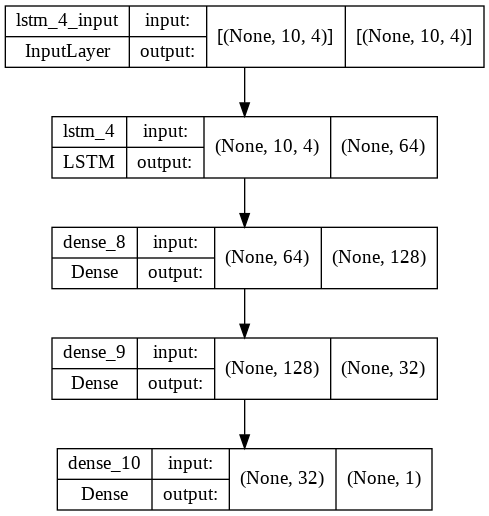

In [ ]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, "lstm.png", show_shapes=True)

In [ ]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, epochs=200, batch_size=16,
                    validation_data=(x_valid, y_valid), callbacks=[early_stop, checkpoint])

Epoch 1/200
32/39 [=======================>......] - ETA: 0s - loss: 0.0510
Epoch 1: val_loss improved from inf to 0.01938, saving model to model/tmp_checkpoint.h5
39/39 [==============================] - 2s 15ms/step - loss: 0.0452 - val_loss: 0.0194
Epoch 2/200
37/39 [===========================>..] - ETA: 0s - loss: 0.0123
Epoch 2: val_loss improved from 0.01938 to 0.00421, saving model to model/tmp_checkpoint.h5
39/39 [==============================] - 0s 11ms/step - loss: 0.0119 - val_loss: 0.0042
Epoch 3/200
39/39 [==============================] - ETA: 0s - loss: 0.0043
Epoch 3: val_loss improved from 0.00421 to 0.00370, saving model to model/tmp_checkpoint.h5
39/39 [==============================] - 0s 10ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 4/200
35/39 [=========================>....] - ETA: 0s - loss: 0.0036
Epoch 4: val_loss improved from 0.00370 to 0.00330, saving model to model/tmp_checkpoint.h5
39/39 [==============================] - 0s 11ms/step - loss: 0.0036

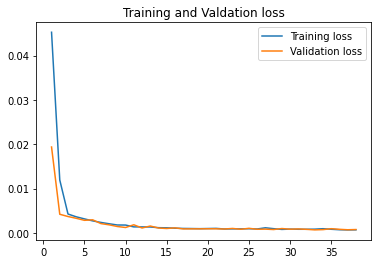

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Valdation loss')
plt.legend()
plt.show()  

## 2-4. 주가 예측

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(328, 1)

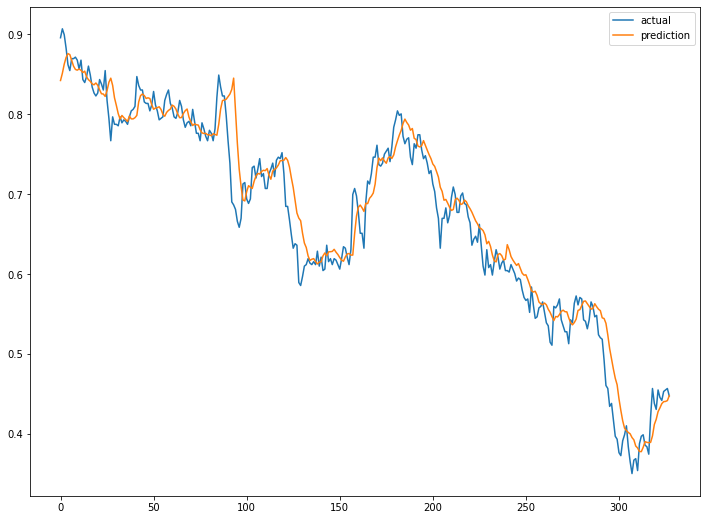

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

### 예측 가격이 실제 가격보다 후행하는 이유는?
* 모델에 인풋 데이터를(시가,고가,저가,거래량) 넣었더니, 5일의 주식가격은 하루전 4일의 주식가격과 똑같습니다라고 예측했음을 보여줍니다.
* 딥러닝의 아웃풋은 loss가 가장 작은 값을 뽑아내도록 모델링 진행 <br>

따라서 본 모델은 학습이 잘못된 것이아니라, loss가 가장 작게 나오도록 효율적인 예측모델을 만든 것입니다.<br>
하지만 위와 같은 모델은 실제에서 사용하기가 힘들겠죠?

### 어떻게 모델을 개선 시킬 것인가?

종가데이터를 타깃으로 진행 했고, 저희는 종가를 맞추려고 했습니다. 하지만 주식에서 당일 종가에 영향을 주는 요인으로는 가격 이외에 다른 요소들이 더 영향을 끼칠것 같네요. 주식가격만으로 다음날 가격을 예측하는 것은 한계가 보이는 사례입니다. 그럼 다른 추가 변수를 더 넣어서 학습을 진행해보도록 하겠습니다.

# **3. LSTM 모델링 (기술지표, 재무제표 지표 등 Feature 구성 후 학습)**

### 3-1. RSI, 종가응용지표 피처 추가

* 상대적 강도지수(RSI) 지표 추가 : RSI는 가격의 상승압력과 하락압력 간의 상대적인 강도를 나타냅니다. <br>
가격이 전일 가격보다 상승한 날의 상승분은 Up(U) <br>
     가격이 전일 가격보다 하락한 날의 하락분은 Down(D) <br>
     U값과 D값의 평균값을 구하여 그것을 각각 Average Ups(AU), Average Downs(AD) <br>
     이 때 AU를 AD값으로 나눈 것을 RS <br>
     RS 값이 크다는 것은 일정 기간 동안 하락한 폭보다 상승한 폭이 크다는 것을 의미합니다.<br>
     RS = AU / AD <br>
     RSI = RS / (1 + RS) = AU / (AU + AD) <br>

* 절대값(전날종가-오늘종가) / 오늘종가 * 100 피처로 추가

### 3-2. RSI 구하기

In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go 
import plotly.subplots as ms 
import plotly.express as px

U = np.where(df_samsung['종가'].diff(1) > 0, df_samsung['종가'].diff(1), 0) 
D = np.where(df_samsung['종가'].diff(1) < 0, df_samsung['종가'].diff(1) *(-1), 0) 
AU = pd.DataFrame(U, index=df_samsung.index).rolling(window=14).mean() 
AD = pd.DataFrame(D, index=df_samsung.index).rolling(window=14).mean() 
RSI = AU / (AD+AU) *100 
df_samsung['RSI'] = RSI
df_samsung['RSI_signal'] = df_samsung["RSI"].rolling(6).mean()

#RSI 추가하기
RSI = go.Scatter(x=df_samsung.index, y=df_samsung['RSI'], line=dict(color='red', width=2), name='RSI', legendgroup='group5', legendgrouptitle_text='RSI')

In [ ]:
from plotly.subplots import make_subplots

#과매수매도구간 데이터 추가 (선으로 표현하기 위하여)
df_samsung['과매수구간'] = 70
df_samsung['과매도구간'] = 30

#그래프 객체 넣기
fig = make_subplots(specs=[[{"secondary_y": True}]])

# creating first plot
fig.add_trace(
    go.Scatter(x=df_samsung.index, y=df_samsung['RSI'], name='df_samsung RSI'),
    secondary_y=False,
)   

# creating next plot
fig.add_trace(
    go.Scatter(x=df_samsung.index, y=df_samsung['RSI_signal'], name='df_samsung RSI_signal') , 
   
    secondary_y=True,
)

# creating next plot
fig.add_trace(
    go.Scatter(x=df_samsung.index, y=df_samsung['과매수구간'], name='과매수구간') , 
   
    secondary_y=True,
)

# creating next plot
fig.add_trace(
    go.Scatter(x=df_samsung.index, y=df_samsung['과매도구간'], name='과매도구간') , 
   
    secondary_y=True,
)
fig.update_layout(title_text="df_samsung RSI", title_x=0.5)
fig.show()

<center><img src="https://drive.google.com/uc?id=1ynVBJqyhHS2z1GAcstxdKsNCW04Ifp3H" height=500 width=1550></center>
<br>



In [ ]:
df_samsung

,시가,고가,저가,종가,거래량,RSI,RSI_signal,과매수구간,과매도구간
날짜,,,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,NaN,NaN,70,30
2018-01-03,52540,52560,51420,51620,200270,NaN,NaN,70,30
2018-01-04,52120,52180,50640,51080,233909,NaN,NaN,70,30
2018-01-05,51300,52120,51200,52120,189623,NaN,NaN,70,30
2018-01-08,52400,52520,51500,52020,167673,NaN,NaN,70,30
...,...,...,...,...,...,...,...,...,...
2022-07-25,60900,61900,60800,61100,9193681,65.853659,65.118519,70,30
2022-07-26,60800,61900,60800,61700,6597211,71.900826,67.178326,70,30
2022-07-27,61300,61900,61200,61800,7320997,67.307692,68.160054,70,30


### 3-3. 종가응용지표 구하기

In [ ]:
aa = abs(df_samsung['종가']-df_samsung['종가'].shift(1))
bb = aa/df_samsung['종가']*100
df_samsung['CLOSE_PRIVATE'] = bb

In [ ]:
df_samsung

,시가,고가,저가,종가,거래량,RSI,RSI_signal,과매수구간,과매도구간,CLOSE_PRIVATE
날짜,,,,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,NaN,NaN,70,30,NaN
2018-01-03,52540,52560,51420,51620,200270,NaN,NaN,70,30,1.162340
2018-01-04,52120,52180,50640,51080,233909,NaN,NaN,70,30,1.057165
2018-01-05,51300,52120,51200,52120,189623,NaN,NaN,70,30,1.995395
2018-01-08,52400,52520,51500,52020,167673,NaN,NaN,70,30,0.192234
...,...,...,...,...,...,...,...,...,...,...
2022-07-25,60900,61900,60800,61100,9193681,65.853659,65.118519,70,30,0.327332
2022-07-26,60800,61900,60800,61700,6597211,71.900826,67.178326,70,30,0.972447
2022-07-27,61300,61900,61200,61800,7320997,67.307692,68.160054,70,30,0.161812


In [ ]:
df_samsung.head(20)

,시가,고가,저가,종가,거래량,RSI,RSI_signal,과매수구간,과매도구간,CLOSE_PRIVATE
날짜,,,,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,NaN,NaN,70,30,NaN
2018-01-03,52540,52560,51420,51620,200270,NaN,NaN,70,30,1.162340
2018-01-04,52120,52180,50640,51080,233909,NaN,NaN,70,30,1.057165
2018-01-05,51300,52120,51200,52120,189623,NaN,NaN,70,30,1.995395
2018-01-08,52400,52520,51500,52020,167673,NaN,NaN,70,30,0.192234
2018-01-09,51460,51720,49980,50400,360272,NaN,NaN,70,30,3.214286
2018-01-10,50500,50520,48640,48840,371336,NaN,NaN,70,30,3.194103
2018-01-11,48200,49260,48020,48240,502476,NaN,NaN,70,30,1.243781
2018-01-12,48240,48480,46760,48200,545409,NaN,NaN,70,30,0.082988


In [ ]:
df_samsung = df_samsung.iloc[18:,:]
df_samsung

,시가,고가,저가,종가,거래량,RSI,RSI_signal,과매수구간,과매도구간,CLOSE_PRIVATE
날짜,,,,,,,,,,
2018-01-26,50500,50780,49840,50780,207002,44.083969,40.287146,70,30,1.024025
2018-01-29,51200,51480,50900,51220,236776,54.408602,42.571876,70,30,0.859039
2018-01-30,50440,50640,49780,49800,245691,55.240175,45.712036,70,30,2.851406
2018-01-31,50020,54140,49600,49900,1293626,59.584296,49.254390,70,30,0.200401
2018-02-01,50620,50960,49720,49820,552189,59.310345,52.230476,70,30,0.160578
...,...,...,...,...,...,...,...,...,...,...
2022-07-25,60900,61900,60800,61100,9193681,65.853659,65.118519,70,30,0.327332
2022-07-26,60800,61900,60800,61700,6597211,71.900826,67.178326,70,30,0.972447
2022-07-27,61300,61900,61200,61800,7320997,67.307692,68.160054,70,30,0.161812


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_samsung.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['시가', '고가', '저가', '종가', '거래량','RSI','CLOSE_PRIVATE']
df_samsung_scaled = scaler.fit_transform(df_samsung[scale_cols])
df_samsung_scaled = pd.DataFrame(df_samsung_scaled)
df_samsung_scaled.columns = scale_cols

df_samsung_scaled

,시가,고가,저가,종가,거래량,RSI,CLOSE_PRIVATE
0,0.559247,0.524587,0.556872,0.248926,0.002292,0.478192,0.108040
1,0.566999,0.531818,0.568715,0.257143,0.002622,0.598028,0.090633
2,0.558583,0.523140,0.556201,0.230626,0.002721,0.607680,0.300839
3,0.553931,0.559298,0.554190,0.232493,0.014325,0.658101,0.021143
4,0.560576,0.526446,0.555531,0.230999,0.006115,0.654921,0.016942
...,...,...,...,...,...,...,...
1105,0.674419,0.639463,0.679330,0.441643,0.101806,0.730868,0.034535
1106,0.673311,0.639463,0.679330,0.452848,0.073054,0.801057,0.102599
1107,0.678848,0.639463,0.683799,0.454715,0.081069,0.747745,0.017072
1108,0.689922,0.646694,0.688268,0.456583,0.118987,0.732567,0.017045


In [ ]:
df_samsung_scaled['날짜'] = df_samsung.index

In [ ]:
df_samsung_scaled.head(5)

,시가,고가,저가,종가,거래량,RSI,CLOSE_PRIVATE,날짜
0,0.559247,0.524587,0.556872,0.248926,0.002292,0.478192,0.108040,2018-01-26
1,0.566999,0.531818,0.568715,0.257143,0.002622,0.598028,0.090633,2018-01-29
2,0.558583,0.523140,0.556201,0.230626,0.002721,0.607680,0.300839,2018-01-30
3,0.553931,0.559298,0.554190,0.232493,0.014325,0.658101,0.021143,2018-01-31
4,0.560576,0.526446,0.555531,0.230999,0.006115,0.654921,0.016942,2018-02-01


### 3-4 모델 학습

In [ ]:
test_size = 1110-777    # 30% test set
window_size = 10
train = df_samsung_scaled[:-test_size]
test = df_samsung_scaled[-test_size:]

In [ ]:
train = train.iloc[:,:7]
test = test.iloc[:,:7]

In [ ]:
feature_cols = ['시가', '고가', '저가', '거래량', 'RSI', 'CLOSE_PRIVATE']
label_cols = ['종가']

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 10)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape


((323, 10, 6), (323, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(64, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

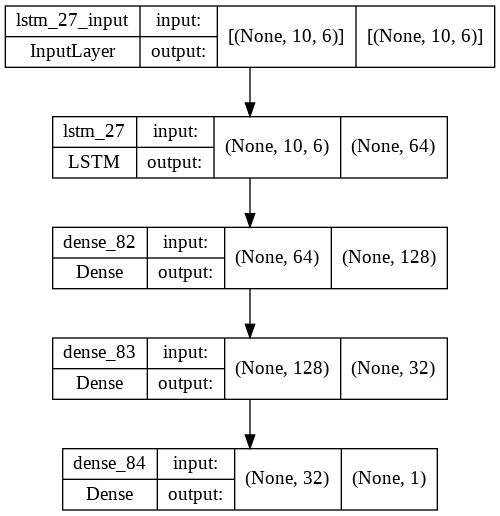

In [ ]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, "lstm.png", show_shapes=True)

In [ ]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint2.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, epochs=200, batch_size=16,
                    validation_data=(x_valid, y_valid), callbacks=[early_stop, checkpoint])

Epoch 1/200
37/39 [===========================>..] - ETA: 0s - loss: 0.0398
Epoch 1: val_loss improved from inf to 0.02139, saving model to model/tmp_checkpoint2.h5
39/39 [==============================] - 2s 17ms/step - loss: 0.0389 - val_loss: 0.0214
Epoch 2/200
35/39 [=========================>....] - ETA: 0s - loss: 0.0140
Epoch 2: val_loss improved from 0.02139 to 0.00379, saving model to model/tmp_checkpoint2.h5
39/39 [==============================] - 0s 11ms/step - loss: 0.0130 - val_loss: 0.0038
Epoch 3/200
36/39 [==========================>...] - ETA: 0s - loss: 0.0029
Epoch 3: val_loss improved from 0.00379 to 0.00204, saving model to model/tmp_checkpoint2.h5
39/39 [==============================] - 0s 11ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 4/200
36/39 [==========================>...] - ETA: 0s - loss: 0.0019
Epoch 4: val_loss improved from 0.00204 to 0.00136, saving model to model/tmp_checkpoint2.h5
39/39 [==============================] - 0s 11ms/step - loss: 0.

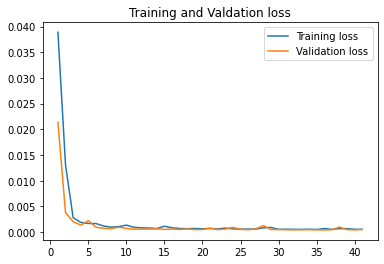

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Valdation loss')
plt.legend()
plt.show()  

### 3-5. 주가 예측

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(323, 1)

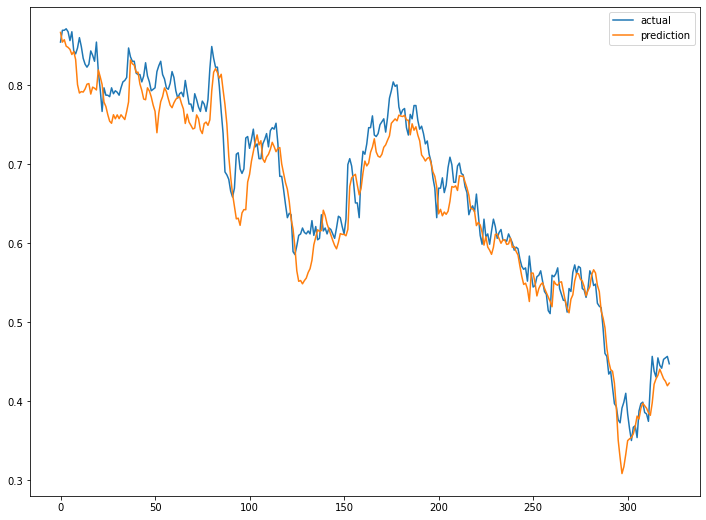

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

### 3-6. 해석
피처로 기본 지표만 활용 했을때보다, RSI, 종가응용지표를 넣어 예측하니 미세하게 좁혀진것 처럼 보이나, LSTM 단독으로는 성능을 기대하기 힘들어 보이며, 세부적인 모델 개선이 필요함이 보입니다. <br>
모델 구성 단계에서 모델링을 세세하게 더 가져가고, 피처에 기본,기술분석 지표 이외에 차트와 같은 캔들 지표나 판매량 이평선 추이도 함께 넣으면 조금 더 유의미한 지표가 되지 않을까 싶습니다. <br><br>
또한 이번 LSTM 모델링을 통해 얻은 insight로는, 가격을 직접적으로 예측 하기보다는, 다음날 상승 혹은 하락에 대한 추이 파악의 1단계로써 활용하고, 그렇게 상승한다고 예측한 주식들에 대한 세부 전략, 하락한다고 예측한 주식들에 대한 세부 전략을 각각 가져가면 조금 더 의미가 있지 않을까 싶습니다.

<center><시가,고가,저가,거래량,><br>
<img src="https://drive.google.com/uc?id=1gcLH7JPm5IXJD1vfAUKYDnULTzlNjv5w" height=300 width=550>
</center>

<center><시가,고가,저가,거래량,RSI,종가응용지표><br>
<img src="https://drive.google.com/uc?id=1yeoqla2dMNtBcdeEst306vzV84tG4ril" height=300 width=550>
</center>


# **4. 백테스팅 및 성과평가**

In [ ]:
!pip3 install backtesting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 5.3 MB/s 
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173832 sha256=4f7df54798b1877fb9dcf0fc61f220b474b6f8be15be2b6c8934d5eba8527426
  Stored in directory: /root/.cache/pip/wheels/48/1d/ea/65dacebc37da7655d8a1fd0f315ac39d102e31d6545237a1c6
Successfully built backtesting


### Strategy

#### 5일 이동평균선이 20일 이동평균선을 뚫고 올라가면 매수<br>5일 이동평균선이 20일 이동평균선을 뚫고 내려오면 매도하는 전략

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA
import pandas as pd

In [ ]:
aa = df_samsung['종가']-df_samsung['종가'].shift(1)
aa>0
df_samsung["target"] = df_samsung["target"].astype(int)
df_samsung_bak = df_samsung.loc[:,['시가','고가','저가','종가','거래량','RSI','CLOSE_PRIVATE','target']]
df_samsung_bak            

In [ ]:
df_samsung_bak_eng = df_samsung_bak.rename(columns={'시가':'Open', '고가':'High', '저가':'Low', '종가':'Close'})
df_samsung_bak_eng

,Open,High,Low,Close,거래량,RSI,CLOSE_PRIVATE,target
날짜,,,,,,,,
2018-01-26,50500,50780,49840,50780,207002,44.083969,1.024025,0
2018-01-29,51200,51480,50900,51220,236776,54.408602,0.859039,1
2018-01-30,50440,50640,49780,49800,245691,55.240175,2.851406,0
2018-01-31,50020,54140,49600,49900,1293626,59.584296,0.200401,1
2018-02-01,50620,50960,49720,49820,552189,59.310345,0.160578,0
...,...,...,...,...,...,...,...,...
2022-07-25,60900,61900,60800,61100,9193681,65.853659,0.327332,0
2022-07-26,60800,61900,60800,61700,6597211,71.900826,0.972447,1
2022-07-27,61300,61900,61200,61800,7320997,67.307692,0.161812,1


In [ ]:
class SmaCross(Strategy):
    n1 = 5
    n2 = 20
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        if crossover(self.sma1, self.sma2):
            self.position.close()
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.position.close()
            self.sell()

### Backtesting

In [ ]:
from backtesting import Backtest

bt = Backtest(df_samsung_bak_eng, SmaCross, cash=1000000, commission=.002)
stats = bt.run()
stats

Start                     2018-01-26 00:00:00
End                       2022-07-29 00:00:00
Duration                   1645 days 00:00:00
Exposure Time [%]                   97.567568
Equity Final [$]                     875985.2
Equity Peak [$]                     1044822.4
Return [%]                          -12.40148
Buy & Hold Return [%]               20.913746
Return (Ann.) [%]                   -2.961246
Volatility (Ann.) [%]               23.760273
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -42.392047
Avg. Drawdown [%]                   -22.17264
Max. Drawdown Duration     1590 days 00:00:00
Avg. Drawdown Duration      799 days 00:00:00
# Trades                                   72
Win Rate [%]                        34.722222
Best Trade [%]                      38.931363
Worst Trade [%]                    -11.341782
Avg. Trade [%]                    

In [ ]:
bt.plot()

Row(id='2082', ...)

### Optimization

In [ ]:
%%time

stats = bt.optimize(n1=range(5, 30, 5),
                    n2=range(10, 70, 5),
                    maximize='Equity Final [$]',
                    constraint=lambda param: param.n1 < param.n2)
stats

Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

CPU times: user 189 ms, sys: 72.4 ms, total: 261 ms
Wall time: 3.65 s


Start                     2018-01-26 00:00:00
End                       2022-07-29 00:00:00
Duration                   1645 days 00:00:00
Exposure Time [%]                   91.531532
Equity Final [$]                    2133074.9
Equity Peak [$]                     2281874.9
Return [%]                          113.30749
Buy & Hold Return [%]               20.913746
Return (Ann.) [%]                   18.766314
Volatility (Ann.) [%]                26.53073
Sharpe Ratio                         0.707343
Sortino Ratio                        1.282131
Calmar Ratio                         0.644906
Max. Drawdown [%]                  -29.099313
Avg. Drawdown [%]                   -4.104739
Max. Drawdown Duration      518 days 00:00:00
Avg. Drawdown Duration       41 days 00:00:00
# Trades                                   15
Win Rate [%]                        53.333333
Best Trade [%]                      58.196328
Worst Trade [%]                     -9.672648
Avg. Trade [%]                    

In [ ]:
stats._strategy

<Strategy SmaCross(n1=15,n2=55)>

In [ ]:
bt.plot(plot_volume=False, plot_pl=False)

Row(id='2636', ...)

### Trade data

In [ ]:
stats.tail()

Expectancy [%]                                              6.25503
SQN                                                         1.48586
_strategy                                     SmaCross(n1=15,n2=55)
_equity_curve                    Equity  DrawdownPct DrawdownDur...
_trades               Size  EntryBar  ExitBar  EntryPrice  ExitP...
dtype: object

In [ ]:
stats['_equity_curve']

,Equity,DrawdownPct,DrawdownDuration
2018-01-26,1000000.0,0.000000,NaT
2018-01-29,1000000.0,0.000000,NaT
2018-01-30,1000000.0,0.000000,NaT
2018-01-31,1000000.0,0.000000,NaT
2018-02-01,1000000.0,0.000000,NaT
...,...,...,...
2022-07-25,2164274.9,0.051537,NaT
2022-07-26,2149874.9,0.057847,NaT
2022-07-27,2147474.9,0.058899,NaT
2022-07-28,2145074.9,0.059951,NaT


In [ ]:
stats['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,-21,94,151,47105.6,44500,54717.6,0.055314,2018-06-19,2018-09-07,80 days
1,23,151,161,44589.0,46550,45103.0,0.043979,2018-09-07,2018-09-21,14 days
2,-23,161,245,46456.9,45050,32358.7,0.030284,2018-09-21,2019-01-29,130 days
3,25,245,311,45140.1,43900,-31002.5,-0.027472,2019-01-29,2019-05-09,100 days
4,-25,311,343,43812.2,45200,-34695.0,-0.031676,2019-05-09,2019-06-25,47 days
5,23,343,379,45290.4,43900,-31979.2,-0.030700,2019-06-25,2019-08-14,50 days
6,-23,379,402,43812.2,48050,-97469.4,-0.096726,2019-08-14,2019-09-19,36 days
7,19,402,516,48146.1,56500,158724.1,0.173511,2019-09-19,2020-03-06,169 days
8,-19,516,571,56387.0,51100,100453.0,0.093763,2020-03-06,2020-05-28,83 days
9,23,571,765,51202.2,81000,685349.4,0.581963,2020-05-28,2021-03-11,287 days


#### LSTM 모델링 기반 백테스팅
이 경우 target을 종가예측이 아닌, 상승시 1, 하락시 0으로 지정하고, LSTM으로 모델을 학습이 필요합니다. <br>
현재는 종가예측을 target으로 했기 때문에, 당장 백테스팅이 어렵지만, 상하락을 target으로 하고, 아래 class에서 내부 구현을 model.predict()의 리턴 인자값을 조금만 처리해서 buy, sell을 하면 해당 전략으로 백테스팅을 할 수 있습니다. 이처럼 모델링을 하더라도, 실제로 백테스팅이나 실제 사용을 위해서는 인풋값, 날짜를 일,월,달,년 맞추고, 타깃을 어떤것을 가져갈지 충분히 고민을 하고 실시하면 사용 가능한 모델을 만들수 있을것 같습니다. <br>


In [ ]:
test_size = 1110-777    # 30% test set
window_size = 10
train = df_samsung_bak[:-test_size]
test = df_samsung_bak[-test_size:]

train = train.iloc[:,:9]
test = test.iloc[:,:9]

feature_cols = ['시가', '고가', '저가', '거래량', 'RSI', 'CLOSE_PRIVATE']
label_cols = ['target']

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 10)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, "lstm.png", show_shapes=True)

In [ ]:
import os
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint3.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, epochs=200, batch_size=10,
                    validation_data=(x_valid, y_valid), callbacks=[early_stop, checkpoint])

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Valdation loss')
plt.legend()
plt.show()  

In [ ]:
df_samsung_bak_eng = df_samsung_bak.rename(columns={'시가':'Open', '고가':'High', '저가':'Low', '종가':'Close'})
df_samsung_bak_eng

In [ ]:
def make_predictset(data, window_size=10):
    print("here {0}".format(data))
    feature_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
    return np.array(feature_list)

class LSTMMODELING(Strategy):
  def init(self):
      self.Open = self.data.Open
      self.High = self.data.High
      self.Low = self.data.Low
      self.SellTrade = self.data.거래량
      self.Rsi = self.data.RSI
      self.ClosePrivate = self.data.CLOSE_PRIVATE
 
  def next(self):
      scale_colss = ['Open', 'High', 'Low', '거래량', 'RSI','CLOSE_PRIVATE']
      df_samsung_bak_eng['Open'] = self.Open
      df_samsung_bak_eng['High'] = self.High
      df_samsung_bak_eng['Low'] = self.Low
      df_samsung_bak_eng['거래량'] = self.SellTrade
      df_samsung_bak_eng['RSI'] = self.Rsi
      df_samsung_bak_eng['CLOSE_PRIVATE'] = self.ClosePrivate

      # train dataset
      bak_feature = make_predictset(df_samsung_bak_eng[scale_colss])
      yPredict = model.predict(bak_feature)
      print(yPredict)
      if yPredict == 1:
          self.order = self.buy()
      else:
          self.order = self.sell()

#### 다음주는 'CNN을 활용한 캔들차트 패턴 예측 모델'를 주제로 찾아 뵙겠습니다. 감사합니다! <br><br>